# Machine Learning With Scikit-Learn

## Data Representation in Scikit-Learn

In [1]:
# import iris dataset
import seaborn as sns
iris = sns.load_dataset('iris')  # genrerates a dataframe of iris df
# check the data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


> Each row refer to a sample and we have `n_samples` and each column is a feature, so we have `n_features`

### Feature Matrix
The feature matrix is thought of as a 2D array or matrix with shape [n_samples, n_features]

### Target Array

The target array or label (often called y) has length n_samples and is usually a 1D array. It can be continous or discrete. It is better thought of as the *dependent variable*

Example: We can use the iris data to create a model that predicts the species of flowers (target) based on some measurements (features)

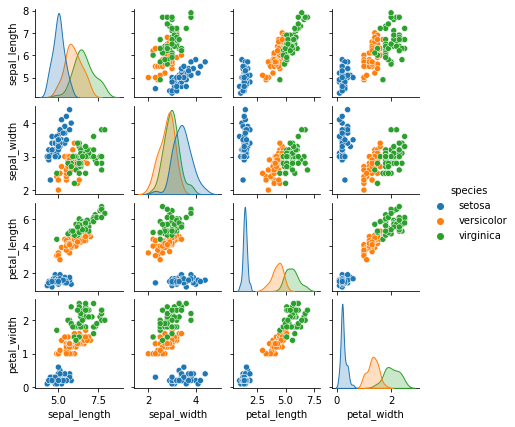

In [2]:
# Top level visualization of the data with Seaborn
%matplotlib inline
sns.pairplot(iris, hue='species', height=1.5)

In [4]:
# Get the features matrix fro iris
X_iris = iris.drop('species', axis=1)  # drops the target array
X_iris.shape

(150, 4)

In [5]:
# get the target array
y_iris = iris['species']
y_iris.shape

(150,)

## Supervised Learning Example


In [6]:
#### Step 1: Data Splitting and Feature Selection

In [7]:
# Step 1: Split data into training and testing set
from sklearn.model_selection import train_test_split  # for data splitting
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [8]:
Xtrain.shape

(112, 4)

In [9]:
Xtest.shape

(38, 4)

In [10]:
Xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


#### Step 2: Predict Model
1. Select a model class
2. Instantiate Model Hyperparameter

In [11]:
# selcting a model
from sklearn.naive_bayes import GaussianNB  # 1. choose model class
model = GaussianNB()                        # 2. Instantiate model
model.fit(Xtrain, ytrain)                   # fit model
y_model = model.predict(Xtest)              # Predict on new data

#### Step 3: Check Model Accuracy
Using the appropriate module in the sklearn.metric library

In [13]:
# import accuracy_score utility
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)             # check how the predicted value perform compared to the origin labels

0.9736842105263158

We have a 97% with this naive classification for this dataset

## Unsupervised Learning Example: Iris Dimensionality

Our iris dataset is currently 4D. That is there are 4 features recorded for each sameple. 

The task of **Dimensionality Reduction** is to determine whether there are suitable lower dimensional representations that retains the essential features of the data. Dimensionality Reduction is often used as an aid to visulize the data in lower dimensions like 2D instead of 4D or more


For this example we will use the `principal component analysis` which is a fast linear dimentionality reduction technique.

In [14]:
# import PCA
from sklearn.decomposition import PCA            # 1. choose model
model = PCA(n_components=2)                      # 2. instantiate model
model.fit(X_iris)                                # 3. fit model to data
X_2D = model.transform(X_iris)                   # 4. transform the data

Now, lets plot the result. Best way is to insert the results into the original Iris dataframe and use Seaborm lmplot to show the results

In [16]:
# looking into the reduced data
X_2D.shape

(150, 2)

In [19]:
type(X_2D)

numpy.ndarray

In [15]:
sns.lmplot?

Signature:
sns.lmplot(
    *,
    x=None,
    y=None,
    data=None,
    hue=None,
    col=None,
    row=None,
    palette=None,
    col_wrap=None,
    height=5,
    aspect=1,
    markers='o',
    sharex=None,
    sharey=None,
    hue_order=None,
    col_order=None,
    row_order=None,
    legend=True,
    legend_out=None,
    x_estimator=None,
    x_bins=None,
    x_ci='ci',
    scatter=True,
    fit_reg=True,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    order=1,
    logistic=False,
    lowess=False,
    robust=False,
    logx=False,
    x_partial=None,
    y_partial=None,
    truncate=True,
    x_jitter=None,
    y_jitter=None,
    scatter_kws=None,
    line_kws=None,
    facet_kws=None,
    size=None,
)
Docstring:
Plot data and regression model fits across a FacetGrid.

This function combines :func:`regplot` and :class:`FacetGrid`. It is
intended as a convenient interface to fit regression models across
conditional subsets of a dataset.

When thinking about how to 

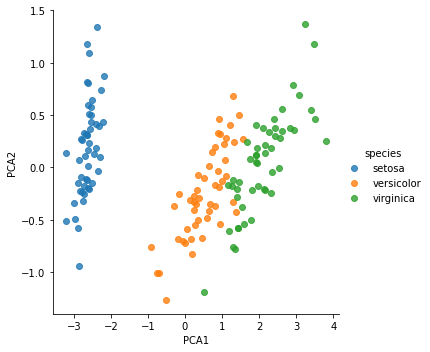

In [20]:
# insert into iris
iris['PCA1'] = X_2D[:, 0]  # first col of X_2D
iris['PCA2'] = X_2D[:, 1]  # second col of X_2D

# plot the data
sns.lmplot(data=iris, x='PCA1', y='PCA2', hue='species', fit_reg=False);

We projected the data to two dimensions and the species are fairly seprated even though the PCA algorithm had no knowledge of the species label. Fantastic 😃!

## Unsupervised Learning: Iris Clustering
A **clustering algorithm** tries to find distinct groups of data without reference to any labels. 

We will use a powerful clustering technique called a Gaussian mixture model (GMM) here. It attempts to model data as a collection of Gaussian blobs.

In [21]:
# import GMM
from sklearn.mixture import GaussianMixture     # select model class
model = GaussianMixture(n_components=3,
                       covariance_type='full')  # instantiate model
model.fit(X_iris)                               # fit model to data
y_gmm = model.predict(X_iris)                   # determine labels or groups

In [22]:
# look into the output
type(y_gmm)

numpy.ndarray

In [24]:
y_gmm.shape  # its a row matrix. 

(150,)

In [33]:
import numpy as np
np.unique(y_gmm)

array([0, 1, 2], dtype=int64)

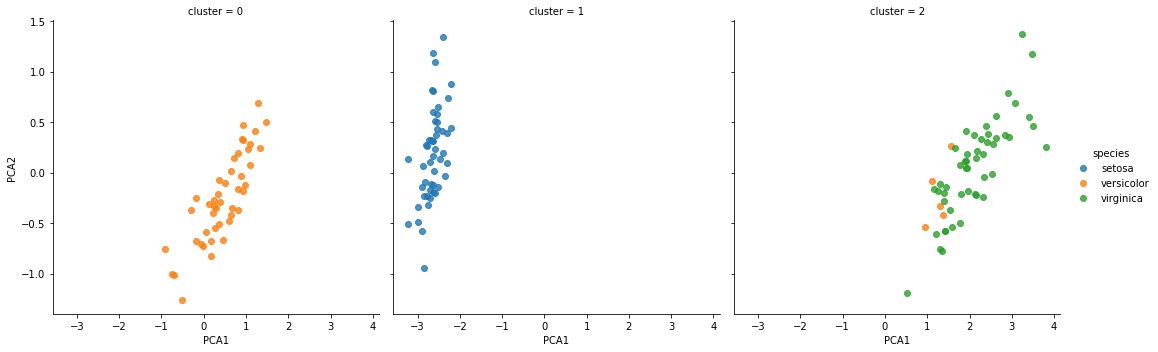

In [25]:
# Plot the data with sns
iris['cluster'] = y_gmm     # add the cluster label to the original data
sns.lmplot(x='PCA1', y='PCA2', hue='species', col='cluster', data=iris, fit_reg=False);

By splitting the data into clusters we see how the GMMalgorithm has recovered the underpying labels. Setosa was perfectly splitted within cluster 1 while there remains a small amount of mixing between versicolor and virginica

## Handwritten Digits Problem

In [34]:
# load dataset
from sklearn.datasets import load_digits
digits = load_digits()

# look into it
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels. Let’s visualize the first hundred of these

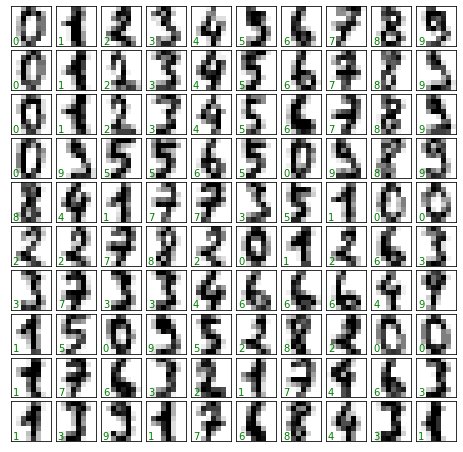

In [37]:
import matplotlib.pyplot as plt

# use the object oriented technique
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

# plot
for index, ax in enumerate(axes.flat):
    ax.imshow(digits.images[index], cmap='binary', interpolation='nearest')
    ax.text(.05, .05, str(digits.target[index]),
           transform=ax.transAxes, color='green');

In order to work with this data within Scikit-Learn, we need a two-dimensional, `[n_samples, n_features]` representation. We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit. Additionally, we need the target array, which gives the previously determined label for each digit. These two quantities are built into the digits dataset under the data and target attributes, respectively:

In [38]:
# getting the features samples
X = digits.data
X.shape

(1797, 64)

In [39]:
y = digits.target
y.shape

(1797,)

> We see here that there are 1,797 samples and 64 features.

### Unsupervised Learning Example: Dimensionality Reduction

We’d like to visualize our points within the 64-dimensional parameter space, but it’s difficult to effectively visualize points in such a high-dimensional space. Instead, we’ll reduce the number of dimensions, using an unsupervised method. Here, we’ll make use of a manifold learning algorithm called Isomap

In [40]:
# import the Isopmap module
from sklearn.manifold import Isomap        # 1. select model class
iso = Isomap(n_components=2)               # 2. instantiate model
iso.fit(X)                                 # 3. fit model to data
X_projected = iso.transform(X)             # 4. Transform data

print(X_projected.shape)

C:\Users\mobol\anaconda3\lib\site-packages\sklearn\manifold\_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\mobol\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)


We see that the projected data is now two-dimensional. Let’s plot this data to see if we can learn anything from its structure

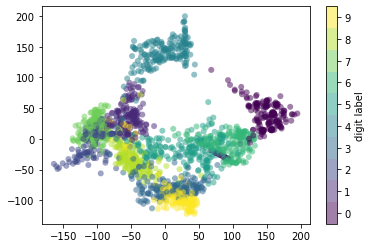

In [41]:
# plotting
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=digits.target,
           edgecolors='none', alpha=.5, cmap=plt.cm.get_cmap('viridis', 10))

# plot colorbar
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

### Classification on Digits

Applying the classification algorithm to the digit data

In [42]:
# split data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

# check data
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(1347, 64) (450, 64) (1347,) (450,)


In [43]:
# fitting model to data using the GaussianNB
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Now that we have the model’s predictions, we can gauge its accuracy by comparing the true values of the test set to the predictions:

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

In [46]:
# just looking at the y_model and y_test

In [48]:
type(y_model) == type(ytest)

True

With even this very simple model, we find about 83% accuracy for classification of the digits!

However, this single number doesn’t tell us where we’ve gone wrong. One nice way to do this is to use the confusion matrix, which we can compute with Scikit-Learn and plot with Seaborn

### Confusion Matrix

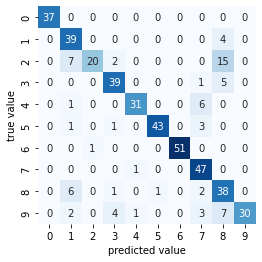

In [49]:
# import the confusion matrix module
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

# plot in sns
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');

Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels. We’ll use green for correct labels and red for incorrect labels

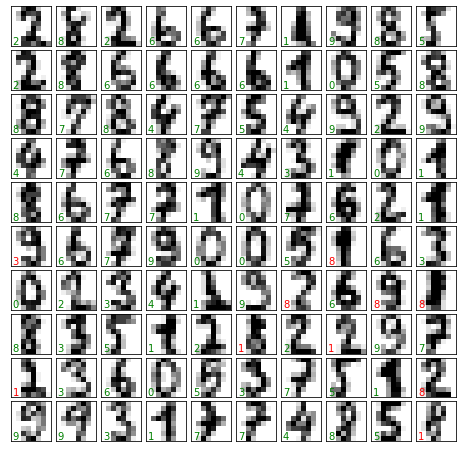

In [50]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                                  subplot_kw={'xticks':[], 'yticks':[]},
                                  gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
             ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
             ax.text(0.05, 0.05, str(y_model[i]),
                     transform=ax.transAxes,
                     color='green' if (ytest[i] == y_model[i]) else 'red')

# Chapter 39: Hyperparameters and Model Validation

- Choose a class of model.

- Choose model hyperparameters.

- Fit the model to the training data.

- Use the model to predict labels for new data or tranform data

## Model Validation the Wrong Way


In [51]:
# loading the dat
from sklearn.datasets import load_iris
# select the features
iris = load_iris()
X = iris.data
y = iris.target

#### using the KNN classifier with n-neighbors=1.

This is a very simple and intuitive model that says “the label of an unknown point is the same as the label of its closest training point”

In [52]:
from sklearn.neighbors import KNeighborsClassifier    # KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)           # instantiate model

In [53]:
model.fit(X, y)   # fit model
y_model = model.predict(X)  # use model to predict

In [54]:
# check model accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

> This approach contains a fundamental flaw: it trains and evaluates the model on the same data. Furthermore, this nearest neighbor model is an instance-based estimator that simply stores the training data, and predicts labels by comparing new data to these stored points: except in contrived cases, it will get 100% accuracy every time!

## Model Validation the Right Way: Holdout Sets

A better sense of a model’s performance can be found by using what’s known as a holdout set: that is, we hold back some subset of the data from the training of the model, and then use this holdout set to check the model’s performance. This can be done using the `train_test_split` utility in Scikit-Learn:

In [55]:
# import train_test_split
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.5)

# fit the model with the trained data
model.fit(X_train, y_train)

# evaluate the model on the test data
y_model = model.predict(X_test)

# calculate the accuracy between the expected and predicted targets
accuracy_score(y_test, y_model)

0.9066666666666666

> We see here a more reasonable result: the one-nearest-neighbor classifier is about 90% accurate on this holdout set. The holdout set is similar to unknown data, because the model has not “seen” it before.

### Model Validation via Cross-Validation

- using *two-fold cross-validation*
- using *`cross_val_score`* convenience routine
- using *leave_one_out* cross-validation

#### Two-fold Cross Validation

This alternately use each half of the data as a holdout (training/validation) set. Using the split data from earlier, we could implement it like this

In [56]:
# carrying out two-fold cv
y1_model = model.fit(X_train, y_train).predict(X_test)
y2_model = model.fit(X_test, y_test).predict(X_train)

# find aaccuracy
accuracy_score(y_test, y1_model), accuracy_score(y_train, y2_model)

(0.9066666666666666, 0.96)

What comes out are two accuracy scores, which we could combine (by, say, taking the mean) to get a better measure of the global model performance. This particular form of cross-validation is a two-fold cross-validation—that is, one in which we have split the data into two sets and used each in turn as a validation set.

#### cross_val_score Utility

We can split the data into five groups and use each in turn to evaluate the model fit on the other four-fifths of the data. This would be rather tedious to do by hand, but we can use Scikit-Learn’s `cross_val_score` convenience routine to do it succinctly:

In [57]:
# import cross_val_score util
from sklearn.model_selection import cross_val_score
# use the util
cross_val_score(model, X, y, cv=5)  # cv=5 indicate thay the model should be fitted and validated in 5 groups instance

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

#### Leave one out

For example, we might wish to go to the extreme case in which our number of folds is equal to the number of data points: that is, we train on all points but one in each trial. This type of cross-validation is known as leave-one-out cross validation, and can be used as follows

In [58]:
# import util
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())

# check the scores
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Because we have 150 samples, the leave-one-out cross-validation yields scores for 150 trials, and each score indicates either a successful (1.0) or an unsuccessful (0.0) prediction. Taking the mean of these gives an estimate of the error rate:

In [59]:
np.mean(scores)

0.96